In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [5]:
dataset=pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
dataset.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [8]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience'>

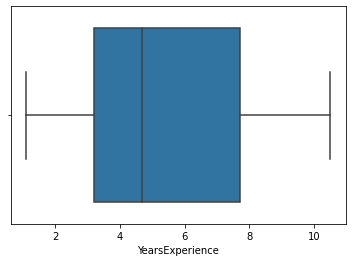

In [10]:
#plot boxplot(outliers)
import seaborn as sns 
sns.boxplot(dataset['YearsExperience'])  #no outliers 

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

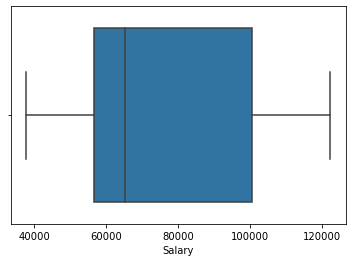

In [11]:
sns.boxplot(dataset['Salary'])

Separating dependent and independent variable 


In [16]:
x=dataset.iloc[:,0:1].values 
y=dataset.iloc[:,-1].values
x


array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [17]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

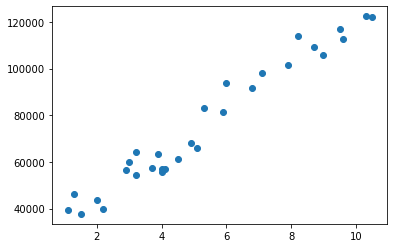

In [18]:
#linearity 
plt.scatter(x,y)   #positive linearity 

In [19]:
x.shape

(30, 1)

In [20]:
#separate data into train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [21]:
x_train.shape #input for the model

(24, 1)

In [22]:
x_test.shape #output

(6, 1)

In [23]:
y_train.shape #input for the model

(24,)

In [25]:
y_test.shape #output

(6,)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr=LinearRegression()

In [28]:
lr.fit(x_train,y_train) #model will alwayes be present in the lr 

LinearRegression()

In [30]:
#prediction
y_pred=lr.predict(x_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [31]:
x_test #for 1.5 actual value is 37731 but model value is 40748

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

In [32]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431.])

In [35]:
#measure accuracy of the model 
from sklearn.metrics import r2_score 
r2_score(y_test,y_pred)

0.988169515729126

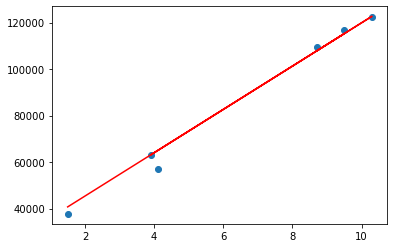

In [36]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,'r')
plt.show()

In [40]:
#model prediction of 7 yrs, we can check for different yrs, 0 is the base salary
lr.predict([[0]])

array([26780.09915063])